In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Missing value imputation by Mean ,Median ,Mode

In [5]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1BiGZSedP4BIIuTbVTBodOhVgFImaz08c") #path to download live = uc?export=download
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df.shape

(1460, 81)

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
missing_value = df.isnull().sum()/df.shape[0]*100
missing_value   #percentage of null value present

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [42]:
var = missing_value[missing_value>17].keys()
var

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
drop_val = df.drop(columns=var)
drop_val.shape #drop 6 column

(1460, 75)

In [13]:
num_val = drop_val.select_dtypes(include = ['int64','float64'])
#num_val = drop_val.select_dtypes('int64','float64') --> code also exclude null value present in int64 and float64
num_val.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [14]:
num_val.shape

(1460, 37)

<Axes: >

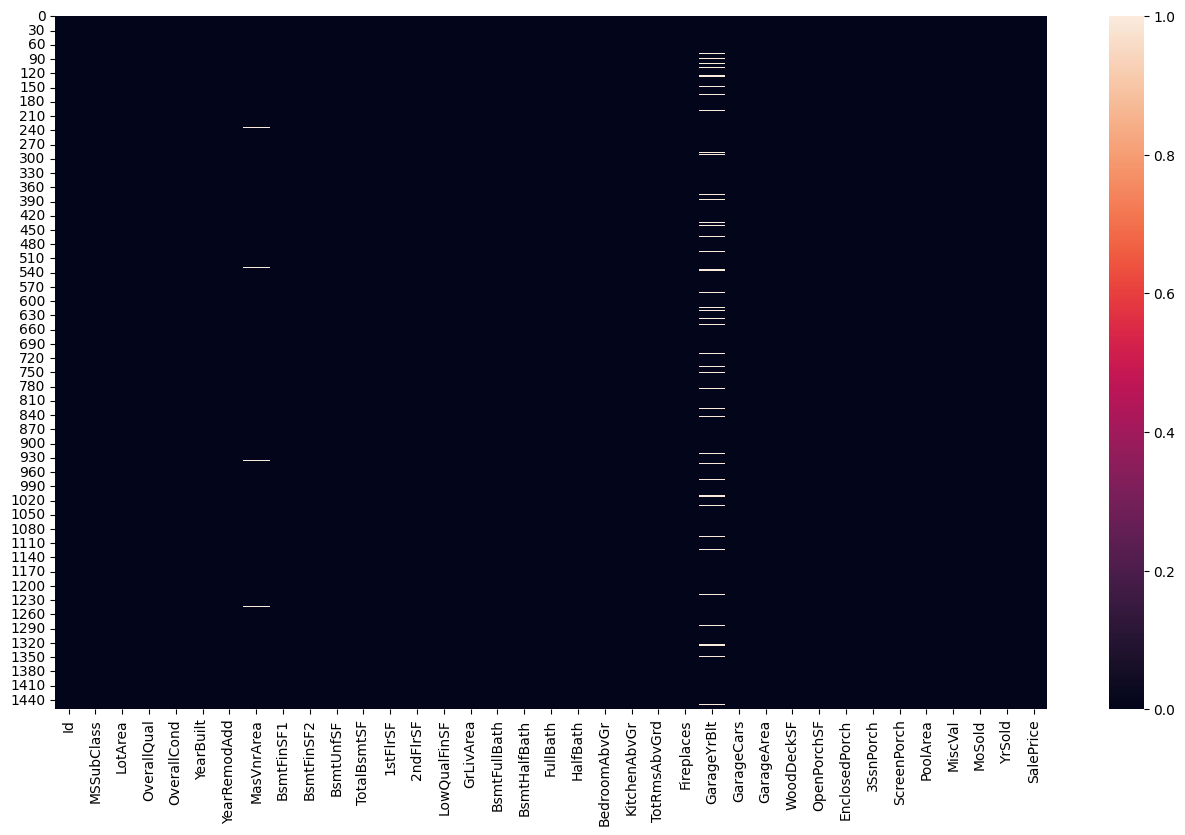

In [15]:
plt.figure(figsize = (16,9))
sns.heatmap(num_val.isnull()) #show zero null value

In [16]:
num_val[num_val.isnull().any(axis = 1)].shape #show having null value

(89, 37)

In [17]:
df[df.isnull().any(axis = 1)]

Output hidden; open in https://colab.research.google.com to view.

In [18]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [55]:
missing_num_var = [var for var in df.columns if df[var].isnull().sum()>0]
missing_num_var  #Column having any missing value


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [101]:
var1 = df[['LotFrontage','MasVnrArea','GarageYrBlt']]
miss = ['LotFrontage','MasVnrArea','GarageYrBlt']

<ipython-input-75-19b34eb9b3f3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], bins=20,hist = False ,kde_kws={'linewidth': 5, 'color': 'blue'})
<ipython-input-75-19b34eb9b3f3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], bins=20,hist = False ,kde_kws={'linew

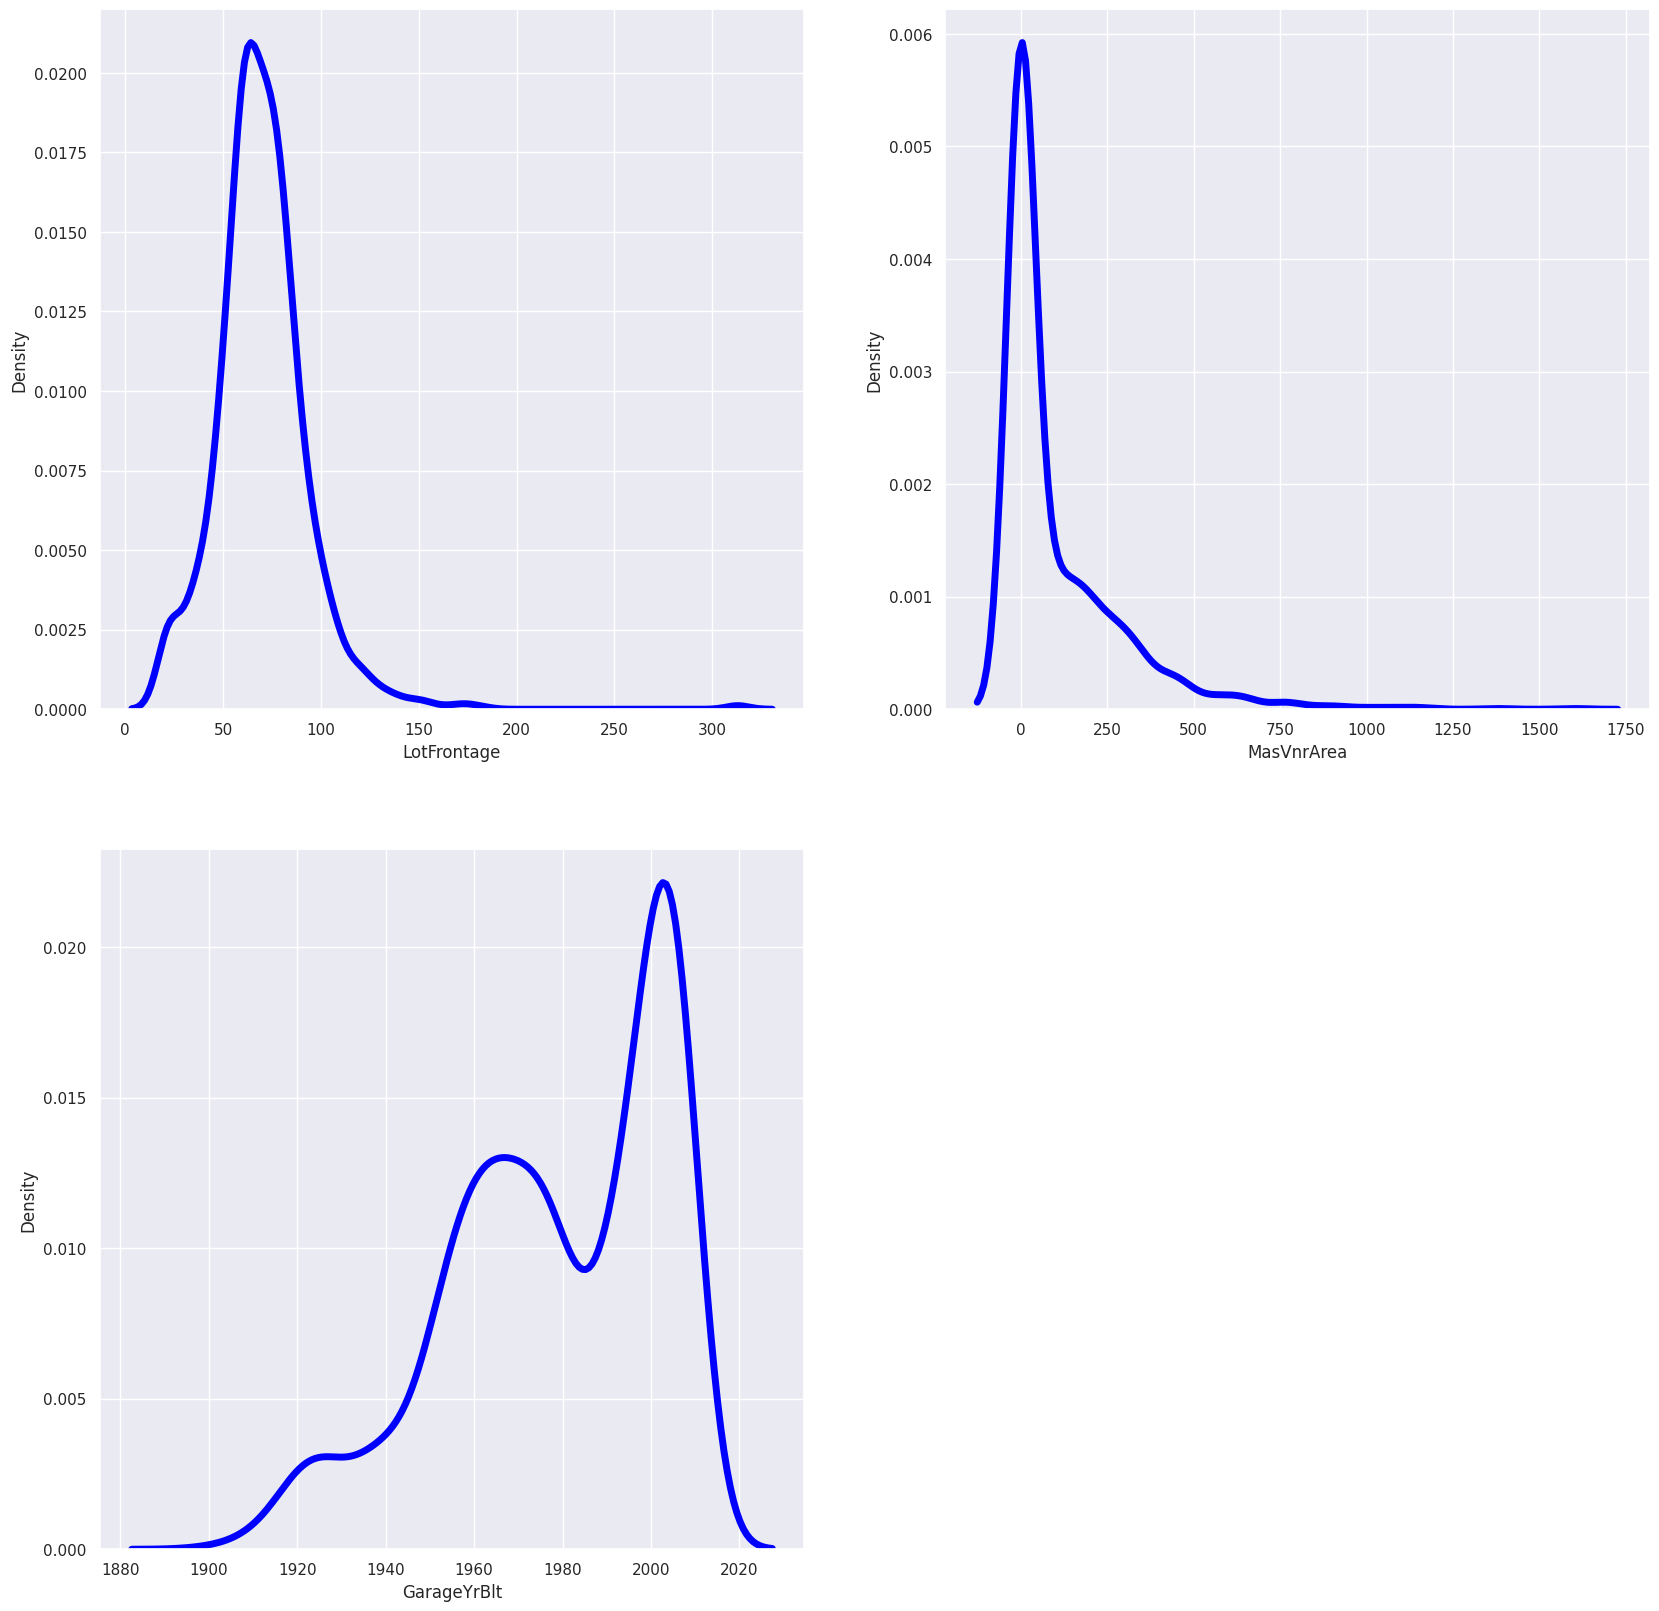

In [75]:
#Fill the missing value
#Step 1 : To view data using distribution plot
plt.figure(figsize=(20, 20))
sns.set()
for i, v in enumerate(var1):
    plt.subplot(2,2, i + 1)   #(x,y,z) x*y = total number of graph and value ,where z = numbering of graph
    sns.distplot(df[v], bins=20,hist = False ,kde_kws={'linewidth': 5, 'color': 'blue'})


In [76]:
#if data distributed normally or symmeteric we use any mean,median and mode
#if left major than we use median
##if right major than we use median

In [77]:
#fillna() = use to fill the null value
df4_num_mean =  var1.fillna(var1.mean())

In [78]:
df4_num_mean.isnull().sum().sum()
#Zero indicate all value is fill in place of null

0

<ipython-input-79-d2292f97ec3b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], hist = False,bins=20, kde_kws={'linewidth': 5, 'color': 'blue'})
<ipython-input-79-d2292f97ec3b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_num_mean[v],hist = False ,bins=20, kde_k

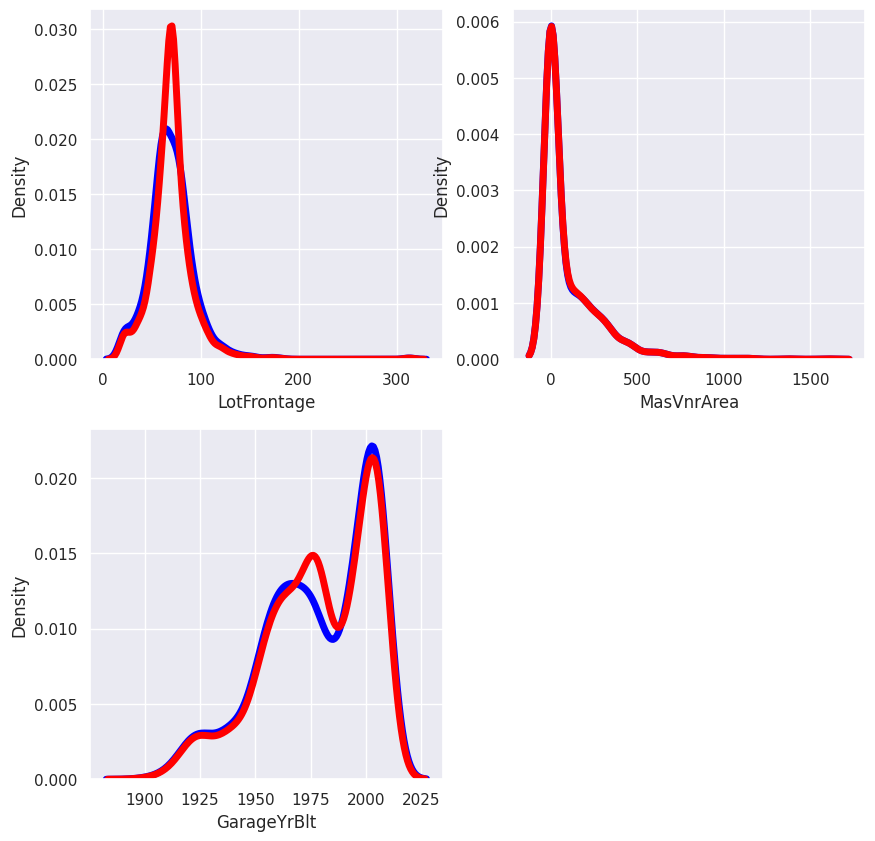

In [79]:
#After applying mean
plt.figure(figsize = (10,10))
sns.set()
for i, v in enumerate(var1):
    plt.subplot(2,2, i + 1)   #(x,y,z) x*y = total number of graph and value ,where z = numbering of graph
    sns.distplot(df[v], hist = False,bins=20, kde_kws={'linewidth': 5, 'color': 'blue'})
    sns.distplot(df4_num_mean[v],hist = False ,bins=20, kde_kws={'linewidth': 5, 'color': 'red'})


In [72]:
df4_num_meadian =  var1.fillna(var1.median())


<ipython-input-82-61f21ca58b09>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[v], bins=20,hist = False ,kde_kws={'linewidth': 5, 'color': 'blue'},label = 'original')
<ipython-input-82-61f21ca58b09>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4_num_meadian[v], hist 

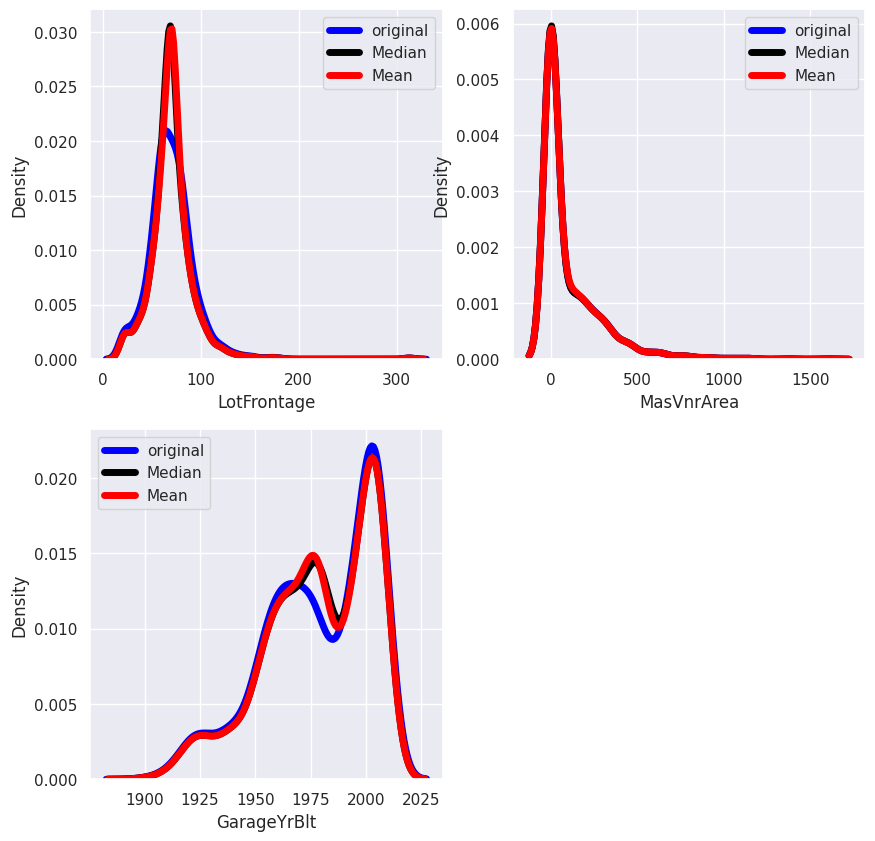

In [82]:
#After applying median
plt.figure(figsize = (10,10))
sns.set()
for i, v in enumerate(var1):
    plt.subplot(2,2, i + 1)   #(x,y,z) x*y = total number of graph and value ,where z = numbering of graph
    sns.distplot(df[v], bins=20,hist = False ,kde_kws={'linewidth': 5, 'color': 'blue'},label = 'original')
    sns.distplot(df4_num_meadian[v], hist = False,bins=20, kde_kws={'linewidth': 5, 'color': 'black'},label = 'Median')
    sns.distplot(df4_num_mean[v], hist = False,bins=20, kde_kws={'linewidth': 5, 'color': 'red'},label = 'Mean')
    plt.legend()  #show the label

No Changes there very less outlier.If there is more outlier than change is more visible


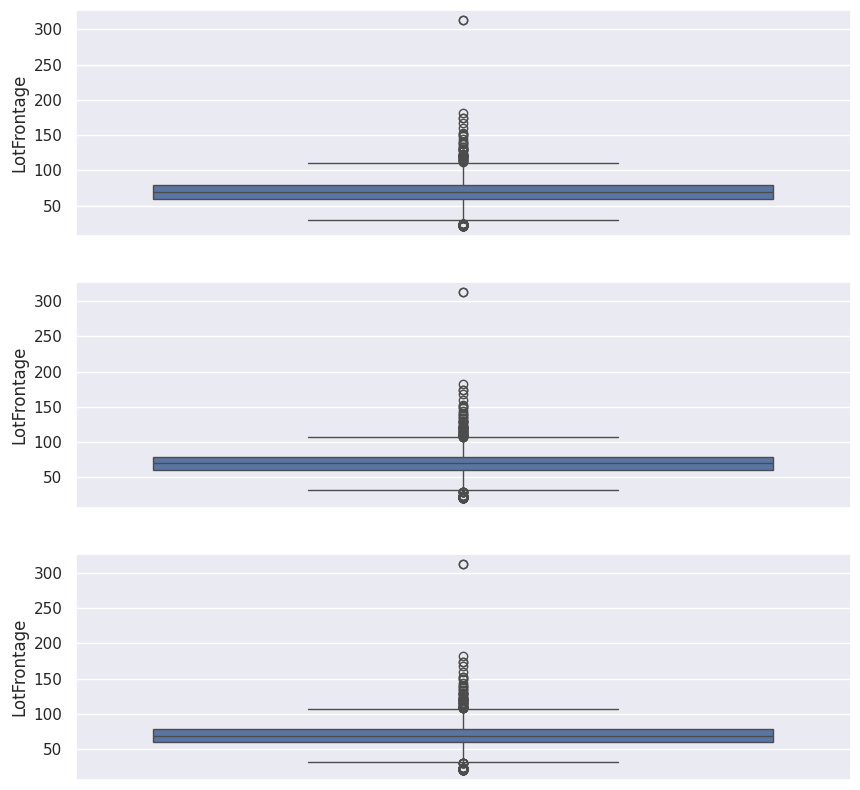

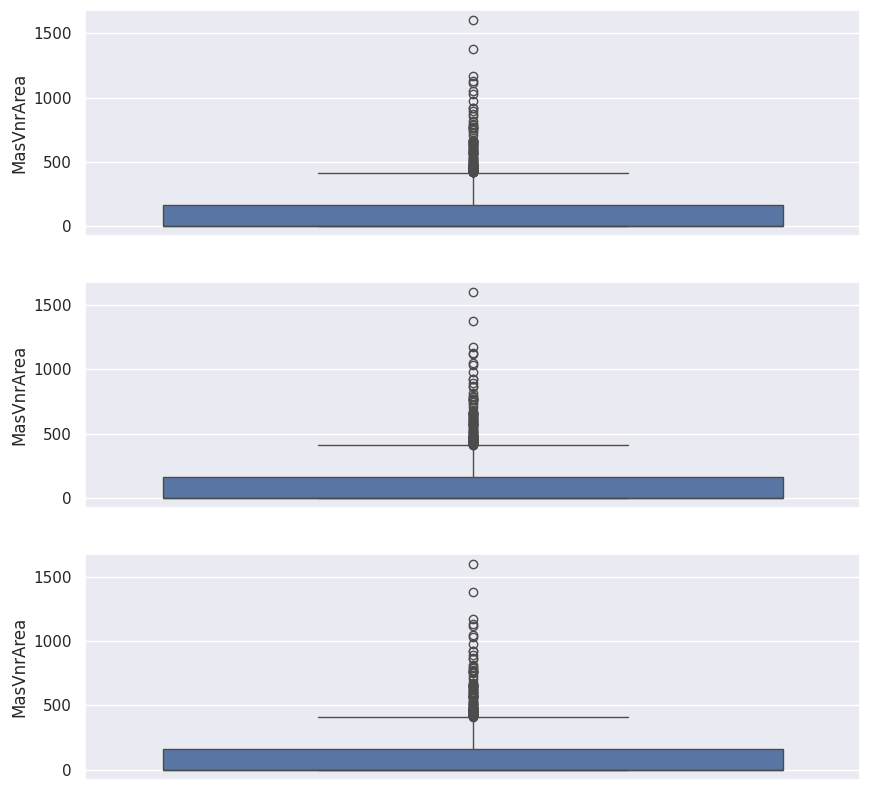

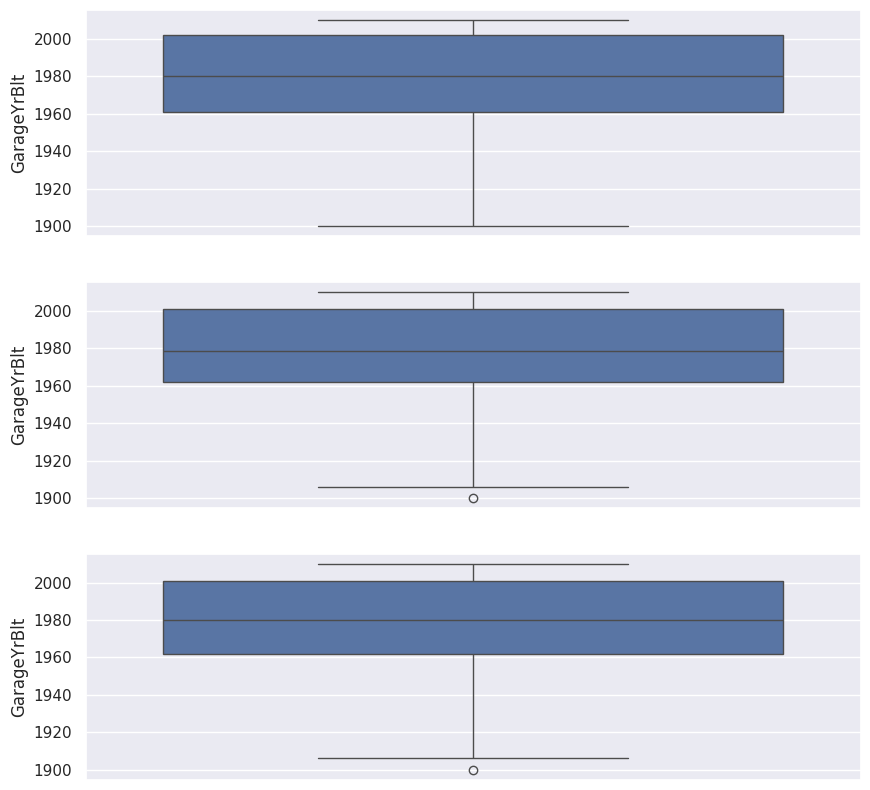

In [84]:
#box plot
for i,v in enumerate(var1):
  plt.figure(figsize = (10,10))
  plt.subplot(3,1,1)
  sns.boxplot(df[v])
  plt.subplot(3,1,2)
  sns.boxplot(df4_num_mean[v])
  plt.subplot(3,1,3)
  sns.boxplot(df4_num_meadian[v])

In [91]:
df_concat = pd.concat([var1,df4_num_meadian,df4_num_mean],axis =1)

In [92]:
df_concat[df_concat.isnull().any(axis = 1)] #show null value only

,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0,69.0,240.0,1973.0,70.049958,240.000000,1973.000000
12,NaN,0.0,1962.0,69.0,0.0,1962.0,70.049958,0.000000,1962.000000
14,NaN,212.0,1960.0,69.0,212.0,1960.0,70.049958,212.000000,1960.000000
16,NaN,180.0,1970.0,69.0,180.0,1970.0,70.049958,180.000000,1970.000000
24,NaN,0.0,1968.0,69.0,0.0,1968.0,70.049958,0.000000,1968.000000
31,NaN,0.0,1966.0,69.0,0.0,1966.0,70.049958,0.000000,1966.000000
39,65.0,0.0,NaN,65.0,0.0,1980.0,65.000000,0.000000,1978.506164
42,NaN,0.0,1983.0,69.0,0.0,1983.0,70.049958,0.000000,1983.000000
43,NaN,0.0,1977.0,69.0,0.0,1977.0,70.049958,0.000000,1977.000000
48,33.0,0.0,NaN,33.0,0.0,1980.0,33.000000,0.000000,1978.506164


#Measure of central tendency for each class


Means central tendency according the class e.g salary is column and java,python is row so central tendency according to python and java not salary

In [93]:
df

Output hidden; open in https://colab.research.google.com to view.

In [94]:
df.shape

(1460, 81)

In [95]:
num_val #numerical value

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [96]:
num_val.shape

(1460, 37)

In [97]:
num_val.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [103]:
df[miss][df[miss].isnull().any(axis=1)] #access the null value


,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
31,NaN,0.0,1966.0
39,65.0,0.0,NaN
42,NaN,0.0,1983.0
43,NaN,0.0,1977.0
48,33.0,0.0,NaN


Filling null value using class support
...Keep in mind reference according the data with comes through domain knowledge.....

In [105]:
df['LotConfig'].unique() #unique value or class

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [108]:
df[df.loc[:,'LotConfig']== "Inside"]['LotFrontage'] #all the data where inside class is present

0        65.0
2        68.0
5        85.0
6        75.0
8        51.0
10       70.0
11       85.0
12        NaN
13       91.0
17       72.0
18       66.0
19       70.0
21       57.0
22       75.0
23       44.0
24        NaN
27       98.0
29       60.0
30       50.0
33       70.0
34       60.0
35      108.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
44       70.0
45       61.0
47       84.0
48       33.0
49       66.0
51       52.0
53       68.0
54       60.0
55      100.0
56       24.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
70       95.0
73       85.0
75       21.0
76        NaN
77       50.0
78       72.0
82       78.0
83       80.0
84        NaN
86      122.0
89       60.0
90       60.0
91       85.0
92       80.0
94       69.0
96       78.0
97       73.0
99       77.0
100       NaN
101      77.0
102      64.0
105      75.0
106      60.0
107      50.0
109     105.0
110   

In [109]:
#fill the null value using mean
df[df.loc[:,'LotConfig']== "Inside"]['LotFrontage'].replace(np.NaN,df[df.loc[:,'LotConfig']== "Inside"]['LotFrontage'].mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [110]:
df_copy = df.copy()
for var_class in df['LotConfig'].unique():
  df_copy.update(df[df.loc[:,'LotConfig']== var_class]['LotFrontage'].replace(np.NaN,df[df.loc[:,'LotConfig']== var_class]['LotFrontage'].mean()))

In [112]:
df_copy.isnull().sum() #LoFrontage have zero null value

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [126]:
na = df_copy.columns[df_copy.isnull().any()].tolist()
print(len(na))
print(na)


18
['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [129]:
#to fill data two columns using class method
num_var_miss = ['MasVnrArea','GarageYrBlt']
cat_vars = ['MasVnrType','GarageType']
for cat_var,num_var_miss in zip(cat_vars,num_var_miss): #zip(kind of dictionary) = use categorical and numerical use together
  for var_class in df[cat_var].unique():
    df_copy.update(df[df.loc[:cat_var,]== var_class][num_var_miss].replace(np.NaN,df[df.loc[:,cat_var]== var_class][num_var_miss
                                                                                                                  ].mean()))


In [131]:
df_copy.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin